In [621]:
# from sklearn.datasets import load_iris
# from sklearn.linear_model import LogisticRegression
# X, y = load_iris(return_X_y=True)
# clf = LogisticRegression(random_state=0).fit(X, y)
# pred = clf.predict([[1,2,3,4],[2,2,2,2],[5,5,5,5]])
# pred
# clf.predict_proba(X[:2, :])
# clf.score(X, y)

In [249]:
# import the library and helps things here 
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, precision_score
from sklearn.metrics import ConfusionMatrixDisplay, recall_score, f1_score, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier

In [76]:
foot = pd.concat(
    map( pd.read_csv, [
        "foot/E0.csv",
        "foot/E0 (1).csv",
        "foot/E0 (2).csv",
        "foot/E0 (3).csv",
        "foot/E0 (4).csv",
        "foot/E0 (5).csv",
        "foot/E0 (6).csv",
        "foot/E0 (7).csv",
        "foot/E0 (8).csv",
        "foot/E0 (9).csv",
        "foot/E0 (10).csv",
        "foot/E0 (11).csv",
        "foot/E0 (12).csv",
        "foot/E0 (13).csv",
        "foot/E0 (14).csv",
        "foot/E0 (15).csv",
        "foot/E0 (16).csv",
        "foot/E0 (17).csv",
        "foot/E0 (18).csv",
        "foot/E0 (19).csv",
        "foot/E0 (20).csv",
        "foot/E0 (21).csv"] 
       ),
    ignore_index=True
)

## problem defination

**Here, we are going to find a better way to predict football matches using hugh datasets from 2003 - 2024 and trying to predict the future matches with machine learning models**

## Steps

* 1 Data Collection
* 2 Data Cleaning ( Preprocessing )
* 3 if any, filling the missing data
* 4 if any, convert the categorical data into numberical one
* 5 feature enginnering ( getting X, y )
* 6 Spliting the data into trainging and test dataset
* 7 find the approprate estimator / algorithms ( model ) to fullfill our need
* 8 fit the model
* 9 measure the scores of the model by diiferent metrics
* 10 model evaluation
* 11 model hyperparametrized process or model improvment
* 12 save the model and reload the model

## 1 data collection

In [77]:
foot.head(10)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,1XBCH,1XBCD,1XBCA,BFECH,BFECD,BFECA,BFEC>2.5,BFEC<2.5,BFECAHH,BFECAHA
0,E0,16/08/03,Arsenal,Everton,2.0,1.0,H,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,16/08/03,Birmingham,Tottenham,1.0,0.0,H,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,16/08/03,Blackburn,Wolves,5.0,1.0,H,2.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,16/08/03,Fulham,Middlesbrough,3.0,2.0,H,1.0,1.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,16/08/03,Leicester,Southampton,2.0,2.0,D,2.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,E0,16/08/03,Man United,Bolton,4.0,0.0,H,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,E0,16/08/03,Portsmouth,Aston Villa,2.0,1.0,H,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,E0,17/08/03,Charlton,Man City,0.0,3.0,A,0.0,2.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,E0,17/08/03,Leeds,Newcastle,2.0,2.0,D,1.0,1.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,E0,17/08/03,Liverpool,Chelsea,1.0,2.0,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## data cleaning / preprocessing

* extracting the relevant columns only

* 1. Match Outcome Variables
* FTHG (Full Time Home Team Goals)
* FTAG (Full Time Away Team Goals)
* FTR (Full Time Result: H=Home Win, D=Draw, A=Away Win)
* HTHG (Half Time Home Team Goals)
* HTAG (Half Time Away Team Goals)
* HTR (Half Time Result: H=Home Win, D=Draw, A=Away Win)

* 2. Match Statistics
* HS (Home Team Shots)
* AS (Away Team Shots)
* HST (Home Team Shots on Target)
* AST (Away Team Shots on Target)
* HF (Home Team Fouls Committed)
* AF (Away Team Fouls Committed)
* HC (Home Team Corners)
* AC (Away Team Corners)
* HY (Home Team Yellow Cards)
* AY (Away Team Yellow Cards)
* HR (Home Team Red Cards)
* AR (Away Team Red Cards)

* 3. Betting Odds
* B365H, B365D, B365A (Bet365 home, draw, away odds)
* BWH, BWD, BWA (Bet&Win home, draw, away odds)
* BbMxH, BbMxD, BbMxA (Betbrain maximum odds for home win, draw, away win)
* BbAvH, BbAvD, BbAvA (Betbrain average odds for home win, draw, away win)
* BbMx>2.5, BbAv>2.5 (Betbrain odds for over 2.5 goals)
* BbMx<2.5, BbAv<2.5 (Betbrain odds for under 2.5 goals)

* 4. Handicap Betting
* BbMxAHH, BbAvAHH (Betbrain maximum and average Asian handicap home team odds)
* BbMxAHA, BbAvAHA (Betbrain maximum and average Asian handicap away team odds)

* 5. Team Information
* HomeTeam
* AwayTeam

In [78]:
fbs = foot[["FTHG", 
            "FTAG", 
            "FTR", 
            "HTHG", 
            "HTAG", 
            "HTR", 
            "HS", 
            "AS",
            "HST", 
            "AST",
            "HF", 
            "AF", 
            "HC", 
            "AC", 
            "HY", 
            "AY" , 
            "HR", 
            "AR"]]

In [206]:
fb = foot.drop(columns=["B365AH",
                               "B365AHA",
                               "B365AHH",
                               "LBAH",
                               "LBAHA",
                               "LBAHH",
                               "GBAH",
                               "GBAHA",
                               "GBAHH",
                               "WHA",
                               "WHD",
                               "WHH",
                               "SBA",
                               "SBD",
                               "SBH",
                               "SOA",
                               "SOD",
                               "SOH",
                               "LBA",
                               "LBD",
                               "LBH",
                               "IWA",
                               "IWD",
                               "IWH",
                               "GBA",
                               "GBD",
                               "GBH",
                               "B365A",
                               "B365D",
                               "B365H",
                                 "B365<2.5",
           "B365>2.5",
           "GB<2.5",
           "GB>2.5",
                       '1XBCH', '1XBCD', '1XBCA', 'BFECH', 'BFECD', 'BFECA', 'BFEC>2.5',
       'BFEC<2.5', 'BFECAHH', 'BFECAHA',
                       'BFEH', 'BFED', 'BFEA', 'BFE>2.5', 'BFE<2.5', 'BFEAHH', 'BFEAHA',
       'BFCH', 'BFCD', 'BFCA',
                       'MaxCAHH', 'MaxCAHA', 'AvgCAHH', 'AvgCAHA', 'BFH', 'BFD', 'BFA', '1XBH',
       '1XBD', '1XBA',
                       'PC<2.5', 'MaxC>2.5', 'MaxC<2.5', 'AvgC>2.5', 'AvgC<2.5', 'AHCh',
       'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA',
                       'VCCA', 'MaxCH', 'MaxCD', 'MaxCA', 'AvgCH', 'AvgCD', 'AvgCA',
       'B365C>2.5', 'B365C<2.5', 'PC>2.5',
                       'BWH', 'BWD', 'BWA', 'SJH', 'SJD', 'SJA',
       'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD',
       'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA',
       'BSH', 'BSD', 'BSA', 'PSH', 'PSD', 'PSA', 'PSCH', 'PSCD', 'PSCA',
       'Time', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA', 'P>2.5',
       'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'AHh', 'PAHH',
       'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'B365CH', 'B365CD',
       'B365CA', 'BWCH', 'BWCD', 'BWCA', 'IWCH', 'IWCD', 'IWCA', 'WHCH',
       'WHCD', 'WHCA', 'VCCH', 'VCCD', "Div", "Referee", "Date"])

In [207]:
fb.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Arsenal,Everton,2.0,1.0,H,1.0,0.0,H,11.0,13.0,5.0,7.0,8.0,15.0,6.0,9.0,1.0,3.0,1.0,1.0
1,Birmingham,Tottenham,1.0,0.0,H,1.0,0.0,H,10.0,15.0,5.0,7.0,20.0,27.0,1.0,4.0,3.0,5.0,0.0,0.0
2,Blackburn,Wolves,5.0,1.0,H,2.0,0.0,H,25.0,8.0,13.0,5.0,8.0,14.0,6.0,2.0,1.0,1.0,0.0,0.0
3,Fulham,Middlesbrough,3.0,2.0,H,1.0,1.0,D,17.0,8.0,9.0,5.0,18.0,16.0,7.0,6.0,1.0,1.0,0.0,0.0
4,Leicester,Southampton,2.0,2.0,D,2.0,0.0,H,12.0,13.0,7.0,10.0,27.0,15.0,2.0,7.0,3.0,1.0,0.0,0.0


In [208]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8011 entries, 0 to 8010
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HomeTeam  8010 non-null   object 
 1   AwayTeam  8010 non-null   object 
 2   FTHG      8010 non-null   float64
 3   FTAG      8010 non-null   float64
 4   FTR       8010 non-null   object 
 5   HTHG      8010 non-null   float64
 6   HTAG      8010 non-null   float64
 7   HTR       8010 non-null   object 
 8   HS        8010 non-null   float64
 9   AS        8010 non-null   float64
 10  HST       8010 non-null   float64
 11  AST       8010 non-null   float64
 12  HF        8010 non-null   float64
 13  AF        8010 non-null   float64
 14  HC        8010 non-null   float64
 15  AC        8010 non-null   float64
 16  HY        8010 non-null   float64
 17  AY        8010 non-null   float64
 18  HR        8010 non-null   float64
 19  AR        8010 non-null   float64
dtypes: float64(16), object(4)
memo

In [209]:
fb.dtypes

HomeTeam     object
AwayTeam     object
FTHG        float64
FTAG        float64
FTR          object
HTHG        float64
HTAG        float64
HTR          object
HS          float64
AS          float64
HST         float64
AST         float64
HF          float64
AF          float64
HC          float64
AC          float64
HY          float64
AY          float64
HR          float64
AR          float64
dtype: object

## change categorical into numerical

* first lets split the data into training and test

In [210]:
fb.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Arsenal,Everton,2.0,1.0,H,1.0,0.0,H,11.0,13.0,5.0,7.0,8.0,15.0,6.0,9.0,1.0,3.0,1.0,1.0
1,Birmingham,Tottenham,1.0,0.0,H,1.0,0.0,H,10.0,15.0,5.0,7.0,20.0,27.0,1.0,4.0,3.0,5.0,0.0,0.0
2,Blackburn,Wolves,5.0,1.0,H,2.0,0.0,H,25.0,8.0,13.0,5.0,8.0,14.0,6.0,2.0,1.0,1.0,0.0,0.0
3,Fulham,Middlesbrough,3.0,2.0,H,1.0,1.0,D,17.0,8.0,9.0,5.0,18.0,16.0,7.0,6.0,1.0,1.0,0.0,0.0
4,Leicester,Southampton,2.0,2.0,D,2.0,0.0,H,12.0,13.0,7.0,10.0,27.0,15.0,2.0,7.0,3.0,1.0,0.0,0.0


In [211]:
fb.isna().sum()

HomeTeam    1
AwayTeam    1
FTHG        1
FTAG        1
FTR         1
HTHG        1
HTAG        1
HTR         1
HS          1
AS          1
HST         1
AST         1
HF          1
AF          1
HC          1
AC          1
HY          1
AY          1
HR          1
AR          1
dtype: int64

In [212]:
fb.dropna(inplace=True)

In [213]:
fb.isna().sum()

HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

In [214]:
#  getting our X, and y
X = fb.drop("FTR", axis=1)
y = fb["FTR"]

In [215]:
X

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Arsenal,Everton,2.0,1.0,1.0,0.0,H,11.0,13.0,5.0,7.0,8.0,15.0,6.0,9.0,1.0,3.0,1.0,1.0
1,Birmingham,Tottenham,1.0,0.0,1.0,0.0,H,10.0,15.0,5.0,7.0,20.0,27.0,1.0,4.0,3.0,5.0,0.0,0.0
2,Blackburn,Wolves,5.0,1.0,2.0,0.0,H,25.0,8.0,13.0,5.0,8.0,14.0,6.0,2.0,1.0,1.0,0.0,0.0
3,Fulham,Middlesbrough,3.0,2.0,1.0,1.0,D,17.0,8.0,9.0,5.0,18.0,16.0,7.0,6.0,1.0,1.0,0.0,0.0
4,Leicester,Southampton,2.0,2.0,2.0,0.0,H,12.0,13.0,7.0,10.0,27.0,15.0,2.0,7.0,3.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8006,Nott'm Forest,Wolves,1.0,1.0,1.0,1.0,D,16.0,11.0,5.0,3.0,15.0,18.0,7.0,3.0,3.0,4.0,0.0,0.0
8007,West Ham,Man City,1.0,3.0,1.0,2.0,A,10.0,23.0,2.0,8.0,10.0,3.0,3.0,11.0,3.0,2.0,0.0,0.0
8008,Chelsea,Crystal Palace,1.0,1.0,1.0,0.0,H,13.0,9.0,7.0,3.0,9.0,13.0,4.0,5.0,4.0,2.0,0.0,0.0
8009,Newcastle,Tottenham,2.0,1.0,1.0,0.0,H,9.0,20.0,3.0,6.0,16.0,13.0,7.0,12.0,4.0,4.0,0.0,0.0


In [216]:
# np.random.seed(90)
# fbx_train, fbx_test, fbt_train, fbt_test = train_test_split(fb.drop(columns=['AC']), fb['AC'], test_size=0.2 )

In [217]:
# fbx_test["HomeTeam"]

In [218]:
# X.dtypes

In [219]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# # Apply LabelEncoder to the HomeTeam and AwayTeam columns
X['HomeTeam'] = label_encoder.fit_transform(X['HomeTeam'])
X['AwayTeam'] = label_encoder.fit_transform(X['AwayTeam'])

In [220]:
X['HomeTeam']

0        0
1        2
2        3
3       16
4       21
        ..
8006    29
8007    41
8008    12
8009    27
8010    25
Name: HomeTeam, Length: 8010, dtype: int32

In [221]:
X_train["HomeTeam"]

5459    24
313     11
7274    27
7883    41
3713    36
        ..
5180    24
1829    25
6250    13
3556    37
388     12
Name: HomeTeam, Length: 6408, dtype: int32

In [222]:
# to combine the numerical to the categorical values
prediction_map = pd.DataFrame()
prediction_map["Home Team Code "] = pd.Series(X['HomeTeam'])
prediction_map["away Team Code"] = pd.Series(X['AwayTeam'])

prediction_map["home team name"] = pd.Series(foot['HomeTeam'])
prediction_map["away team name"] = pd.Series(foot['AwayTeam'])

In [223]:
# prediction_map[prediction_map["home team name"] == "Arsenal"]
prediction_map

,Home Team Code,away Team Code,home team name,away team name
0,0,15,Arsenal,Everton
1,2,38,Birmingham,Tottenham
2,3,43,Blackburn,Wolves
3,16,26,Fulham,Middlesbrough
4,21,34,Leicester,Southampton
...,...,...,...,...
8006,29,43,Nott'm Forest,Wolves
8007,41,24,West Ham,Man City
8008,12,13,Chelsea,Crystal Palace
8009,27,38,Newcastle,Tottenham


In [224]:
X.dtypes

HomeTeam      int32
AwayTeam      int32
FTHG        float64
FTAG        float64
HTHG        float64
HTAG        float64
HTR          object
HS          float64
AS          float64
HST         float64
AST         float64
HF          float64
AF          float64
HC          float64
AC          float64
HY          float64
AY          float64
HR          float64
AR          float64
dtype: object

In [225]:
# must be change in to numerical columns = Date, HomeTeam, AwayTeam, FTR, HTR

# cate_cols = ["FTR", "HTR"]
# one_hot = OneHotEncoder()
# transformer = ColumnTransformer([ ( "one_hot",
#                                      one_hot,
#                                      cate_cols
#                                   )],
#                                remainder="passthrough")
# transform_X = transformer.fit_transform(X)
# pd.DataFrame(transform_X)
y

0       H
1       H
2       H
3       H
4       D
       ..
8006    D
8007    A
8008    D
8009    H
8010    A
Name: FTR, Length: 8010, dtype: object

In [226]:
y = label_encoder.fit_transform(y)
X["HTR"] = label_encoder.fit_transform(X["HTR"])
# X["FTR"] = label_encoder.fit_transform(X["FTR"])

X["HTR"], y

(0       2
 1       2
 2       2
 3       1
 4       2
        ..
 8006    1
 8007    0
 8008    2
 8009    2
 8010    0
 Name: HTR, Length: 8010, dtype: int32,
 array([2, 2, 2, ..., 1, 2, 0]))

In [227]:
# lets change the date obj in to datetime
# X["Date"] = pd.to_datetime(X["Date"])

# Drop the Date column if it's not needed
# X = X.drop(columns=['Date'],  axis=1)

# OR, extract useful information from Date (if needed)
# X['Date'] = pd.to_datetime(X['Date'])  # Ensure Date is in DateTime format
# X['Year'] = X['Date'].dt.year
# X['Month'] = X['Date'].dt.month
# X['Day'] = X['Date'].dt.day

# X["Date"] = X["Date"].astype(dtype=("str"))
# X["Date"] = X["Date"].astype(dtype=("int"))

In [228]:
X

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,15,2.0,1.0,1.0,0.0,2,11.0,13.0,5.0,7.0,8.0,15.0,6.0,9.0,1.0,3.0,1.0,1.0
1,2,38,1.0,0.0,1.0,0.0,2,10.0,15.0,5.0,7.0,20.0,27.0,1.0,4.0,3.0,5.0,0.0,0.0
2,3,43,5.0,1.0,2.0,0.0,2,25.0,8.0,13.0,5.0,8.0,14.0,6.0,2.0,1.0,1.0,0.0,0.0
3,16,26,3.0,2.0,1.0,1.0,1,17.0,8.0,9.0,5.0,18.0,16.0,7.0,6.0,1.0,1.0,0.0,0.0
4,21,34,2.0,2.0,2.0,0.0,2,12.0,13.0,7.0,10.0,27.0,15.0,2.0,7.0,3.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8006,29,43,1.0,1.0,1.0,1.0,1,16.0,11.0,5.0,3.0,15.0,18.0,7.0,3.0,3.0,4.0,0.0,0.0
8007,41,24,1.0,3.0,1.0,2.0,0,10.0,23.0,2.0,8.0,10.0,3.0,3.0,11.0,3.0,2.0,0.0,0.0
8008,12,13,1.0,1.0,1.0,0.0,2,13.0,9.0,7.0,3.0,9.0,13.0,4.0,5.0,4.0,2.0,0.0,0.0
8009,27,38,2.0,1.0,1.0,0.0,2,9.0,20.0,3.0,6.0,16.0,13.0,7.0,12.0,4.0,4.0,0.0,0.0


In [229]:
# Then, you can drop the original Date column
# X = X.drop(columns=['Date'])

In [230]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8010 entries, 0 to 8010
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HomeTeam  8010 non-null   int32  
 1   AwayTeam  8010 non-null   int32  
 2   FTHG      8010 non-null   float64
 3   FTAG      8010 non-null   float64
 4   HTHG      8010 non-null   float64
 5   HTAG      8010 non-null   float64
 6   HTR       8010 non-null   int32  
 7   HS        8010 non-null   float64
 8   AS        8010 non-null   float64
 9   HST       8010 non-null   float64
 10  AST       8010 non-null   float64
 11  HF        8010 non-null   float64
 12  AF        8010 non-null   float64
 13  HC        8010 non-null   float64
 14  AC        8010 non-null   float64
 15  HY        8010 non-null   float64
 16  AY        8010 non-null   float64
 17  HR        8010 non-null   float64
 18  AR        8010 non-null   float64
dtypes: float64(16), int32(3)
memory usage: 1.1 MB


In [231]:
# np.random.seed(90)
#  getting our X, and y
# X = fb.drop("AC", axis=1)
# y = fb["AC"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [232]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6408, 19), (1602, 19), (6408,), (1602,))

In [233]:
X.dtypes

HomeTeam      int32
AwayTeam      int32
FTHG        float64
FTAG        float64
HTHG        float64
HTAG        float64
HTR           int32
HS          float64
AS          float64
HST         float64
AST         float64
HF          float64
AF          float64
HC          float64
AC          float64
HY          float64
AY          float64
HR          float64
AR          float64
dtype: object

In [234]:
# lets visualize the clean data as much as possible we were trying to clean the data
# X.plot().bar(X["Year"] , y)

KeyError: 'Date'

<Figure size 640x480 with 0 Axes>

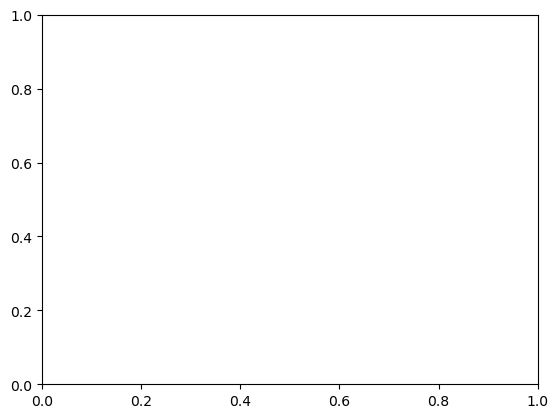

In [797]:
fig = plt.figure()
fig, ax = plt.subplots()
ax.bar(X["Date"], y, color=["red"])

In [ ]:
fig = plt.figure()
fig, ax = plt.subplots()
ax.bar(X["HTR"], y, color=["salmon"])

<BarContainer object of 8010 artists>

<Figure size 640x480 with 0 Axes>

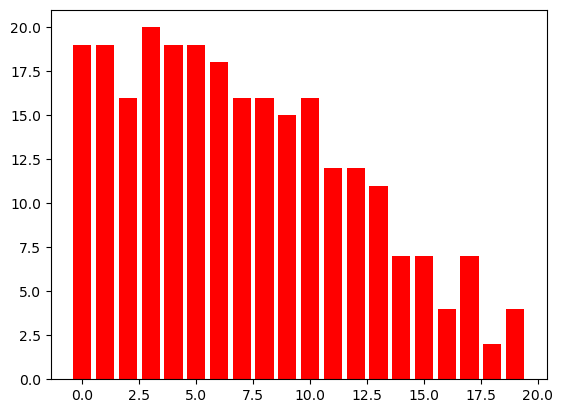

In [546]:
fig = plt.figure()
fig, ax = plt.subplots()
ax.bar(y, X["HC"], color=["red"])

<BarContainer object of 8010 artists>

<Figure size 640x480 with 0 Axes>

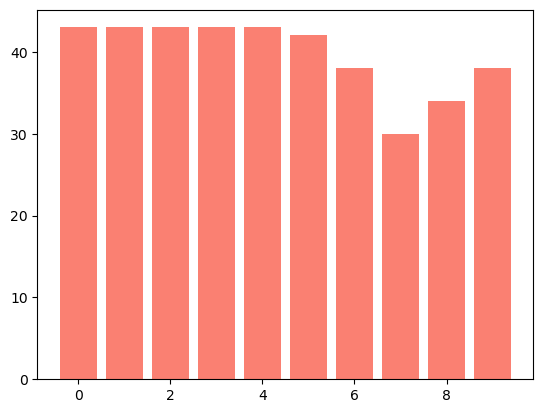

In [555]:
fig = plt.figure()
fig, ax = plt.subplots()
ax.bar(X["FTHG"], X["HomeTeam"], color=["salmon"])

In [176]:
# model = RandomForestRegressor()

In [177]:
# model.fit(X_test, y_test)

## trying the diff model to get the accurate one

In [235]:
model = {
    "RFC": RandomForestClassifier(),
    "RFR": RandomForestRegressor(),
    "LR": LinearRegression(),
    "RI" : Ridge(),
    "KNN": KNeighborsClassifier()
}

In [236]:
def fit_score(model, X_train, X_test, y_train, y_test):
    
    np.random.seed(90)
    model_scores = {}
    for name, model in model.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [237]:
model_score = fit_score(model=model,
                       X_train=X_train,
                       X_test=X_test,
                       y_train=y_train,
                       y_test=y_test)
model_score

{'RFC': 0.9943820224719101,
 'RFR': 0.9990336101252585,
 'LR': 0.7583935205968565,
 'RI': 0.7583793290477461,
 'KNN': 0.5499375780274657}

In [238]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [54]:
gs_log_reg.best_params_

{'C': 32.90344562312671, 'solver': 'liblinear'}

In [67]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.90344562312671, solver='liblinear')

In [68]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.90344562312671, solver='liblinear')

In [69]:
clf.score(X_test, y_test)

0.9993757802746567

In [70]:
pred = clf.predict(X_test)
pred

array([2, 2, 2, ..., 2, 2, 0], dtype=int64)

In [71]:
np.array(y_test)

array([2, 2, 2, ..., 2, 2, 0], dtype=int64)

In [239]:
for i in range(1, 100, 10):
    print(f"the n estimators: {i}")
    model_1 = RandomForestClassifier(n_estimators=i)
    model_1.fit(X_train, y_train)
    print(f"the model score: {model_1.score(X_test, y_test) * 100}:.2f")

the n estimators: 1
the model score: 88.20224719101124:.2f
the n estimators: 11
the model score: 98.75156054931335:.2f
the n estimators: 21
the model score: 99.25093632958801:.2f
the n estimators: 31
the model score: 99.18851435705368:.2f
the n estimators: 41
the model score: 99.25093632958801:.2f
the n estimators: 51
the model score: 99.37578027465668:.2f
the n estimators: 61
the model score: 99.50062421972534:.2f
the n estimators: 71
the model score: 99.25093632958801:.2f
the n estimators: 81
the model score: 99.56304619225968:.2f
the n estimators: 91
the model score: 99.37578027465668:.2f


In [242]:
RFC = RandomForestClassifier(n_estimators=81)
RFC.fit(X_train, y_train)

RandomForestClassifier(n_estimators=81)

In [243]:
RFC.score(X_test, y_test)

0.9925093632958801

In [264]:
y_pred = RFC.predict(X_test)
y_pred, y_test

(array([0, 2, 0, ..., 0, 0, 2]), array([0, 2, 0, ..., 0, 0, 2]))

In [245]:
print(confusion_matrix(y_test, y_pred))

[[461   1   1]
 [  0 384   7]
 [  0   3 745]]


In [246]:
print(mean_absolute_error(y_pred, y_test))

0.008114856429463172


In [247]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       463
           1       0.99      0.98      0.99       391
           2       0.99      1.00      0.99       748

    accuracy                           0.99      1602
   macro avg       0.99      0.99      0.99      1602
weighted avg       0.99      0.99      0.99      1602



In [254]:
# Find the precision score of the model using precision_score()
print(f"here is your precision score: {precision_score(y_test, y_pred, average='micro')}")

# Find the recall score
print(f"here is your precision score: {recall_score(y_test, y_pred, average='micro')}")

# Find the F1 score
print(f"here is your precision score: {f1_score(y_test, y_pred, average='micro')}")

here is your precision score: 0.9925093632958801
here is your precision score: 0.9925093632958801
here is your precision score: 0.9925093632958801


In [256]:
X.tail()

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
8006,29,43,1.0,1.0,1.0,1.0,1,16.0,11.0,5.0,3.0,15.0,18.0,7.0,3.0,3.0,4.0,0.0,0.0
8007,41,24,1.0,3.0,1.0,2.0,0,10.0,23.0,2.0,8.0,10.0,3.0,3.0,11.0,3.0,2.0,0.0,0.0
8008,12,13,1.0,1.0,1.0,0.0,2,13.0,9.0,7.0,3.0,9.0,13.0,4.0,5.0,4.0,2.0,0.0,0.0
8009,27,38,2.0,1.0,1.0,0.0,2,9.0,20.0,3.0,6.0,16.0,13.0,7.0,12.0,4.0,4.0,0.0,0.0
8010,25,22,0.0,3.0,0.0,2.0,0,8.0,11.0,3.0,3.0,7.0,7.0,5.0,2.0,4.0,1.0,0.0,0.0


In [285]:
RFC.predict([[12,24,2,1,1,2,1,10,11,3,5,12,9,4,3,1,1,0,0]])

C:\Users\mulle\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

In [261]:
prediction_map

,Home Team Code,away Team Code,home team name,away team name
0,0,15,Arsenal,Everton
1,2,38,Birmingham,Tottenham
2,3,43,Blackburn,Wolves
3,16,26,Fulham,Middlesbrough
4,21,34,Leicester,Southampton
...,...,...,...,...
8006,29,43,Nott'm Forest,Wolves
8007,41,24,West Ham,Man City
8008,12,13,Chelsea,Crystal Palace
8009,27,38,Newcastle,Tottenham


In [1]:
!pip install speechbrain transformers

   ---------------------------------------- 0.0/807.2 kB ? eta -:--:--
   - -------------------------------------- 30.7/807.2 kB ? eta -:--:--
   - -------------------------------------- 30.7/807.2 kB ? eta -:--:--
   - -------------------------------------- 30.7/807.2 kB ? eta -:--:--
   - -------------------------------------- 30.7/807.2 kB ? eta -:--:--
   -- ------------------------------------ 61.4/807.2 kB 273.8 kB/s eta 0:00:03
   -- ------------------------------------ 61.4/807.2 kB 273.8 kB/s eta 0:00:03
   ---- ---------------------------------- 92.2/807.2 kB 249.8 kB/s eta 0:00:03
   ---- ---------------------------------- 92.2/807.2 kB 249.8 kB/s eta 0:00:03
   ---- ---------------------------------- 92.2/807.2 kB 249.8 kB/s eta 0:00:03
   ------ ------------------------------- 143.4/807.2 kB 293.9 kB/s eta 0:00:03
   ------- ------------------------------ 163.8/807.2 kB 298.3 kB/s eta 0:00:03
   -------- ----------------------------- 174.1/807.2 kB 299.5 kB/s eta 0:00:03
 

In [2]:
from speechbrain.inference.ASR import EncoderASR
asr_model = EncoderASR.from_hparams(source="speechbrain/asr-wav2vec2-dvoice-amharic", savedir="pretrained_models/asr-wav2vec2-dvoice-amharic")
asr_model.transcribe_file('speechbrain/asr-wav2vec2-dvoice-amharic/example_amharic.wav')

SpeechBrain could not find any working torchaudio backend. Audio files may fail to load. Follow this link for instructions and troubleshooting: https://pytorch.org/audio/stable/index.html


hyperparams.yaml:   0%|          | 0.00/2.70k [00:00<?, ?B/s]

SpeechBrain could not find any working torchaudio backend. Audio files may fail to load. Follow this link for instructions and troubleshooting: https://pytorch.org/audio/stable/index.html


config.json:   0%|          | 0.00/1.77k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.27G [00:00<?, ?B/s]

C:\Users\mulle\anaconda3\Lib\inspect.py:992: UserWarning: Module 'speechbrain.pretrained' was deprecated, redirecting to 'speechbrain.inference'. Please update your script. This is a change from SpeechBrain 1.0. See: https://github.com/speechbrain/speechbrain/releases/tag/v1.0.0
  if ismodule(module) and hasattr(module, '__file__'):


ConnectionError: (MaxRetryError('HTTPSConnectionPool(host=\'huggingface.co\', port=443): Max retries exceeded with url: /facebook/wav2vec2-large-xlsr-53/resolve/main/model.safetensors (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000002703BC1EE90>: Failed to resolve \'huggingface.co\' ([Errno 11002] getaddrinfo failed)"))'), '(Request ID: 6d4f8d32-1e5e-4b8a-848b-84e75c561b43)')